In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

!pip install -q git+https://github.com/RobertTLange/evosax.git@main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
You should consider upgrading via the '/Users/chatt07/Desktop/readout_env/bin/python3 -m pip install --upgrade pip' command.


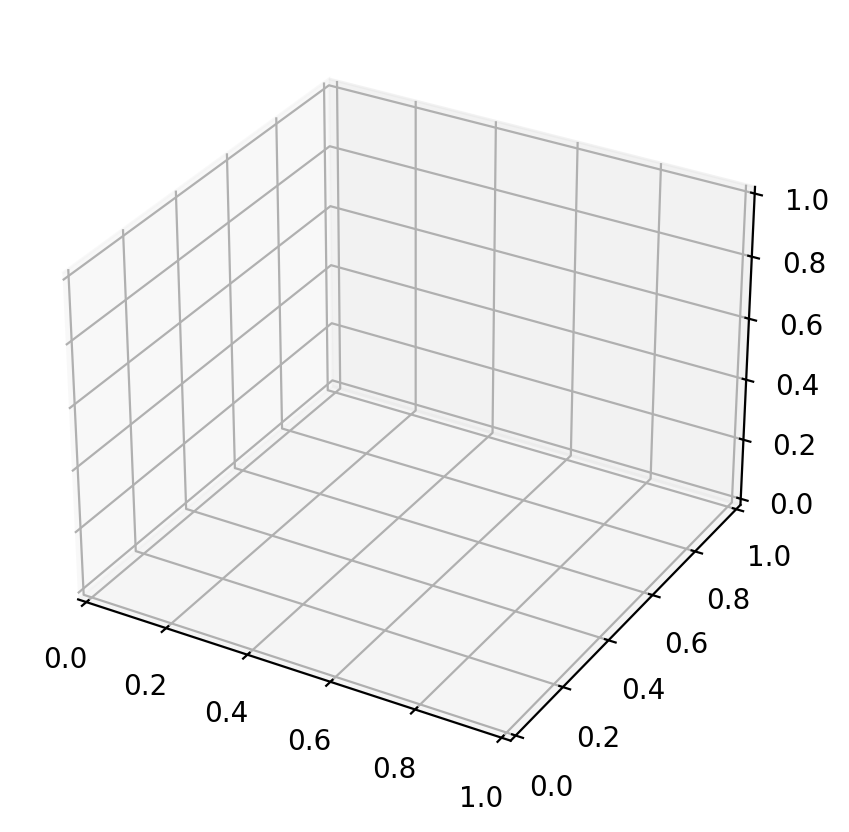

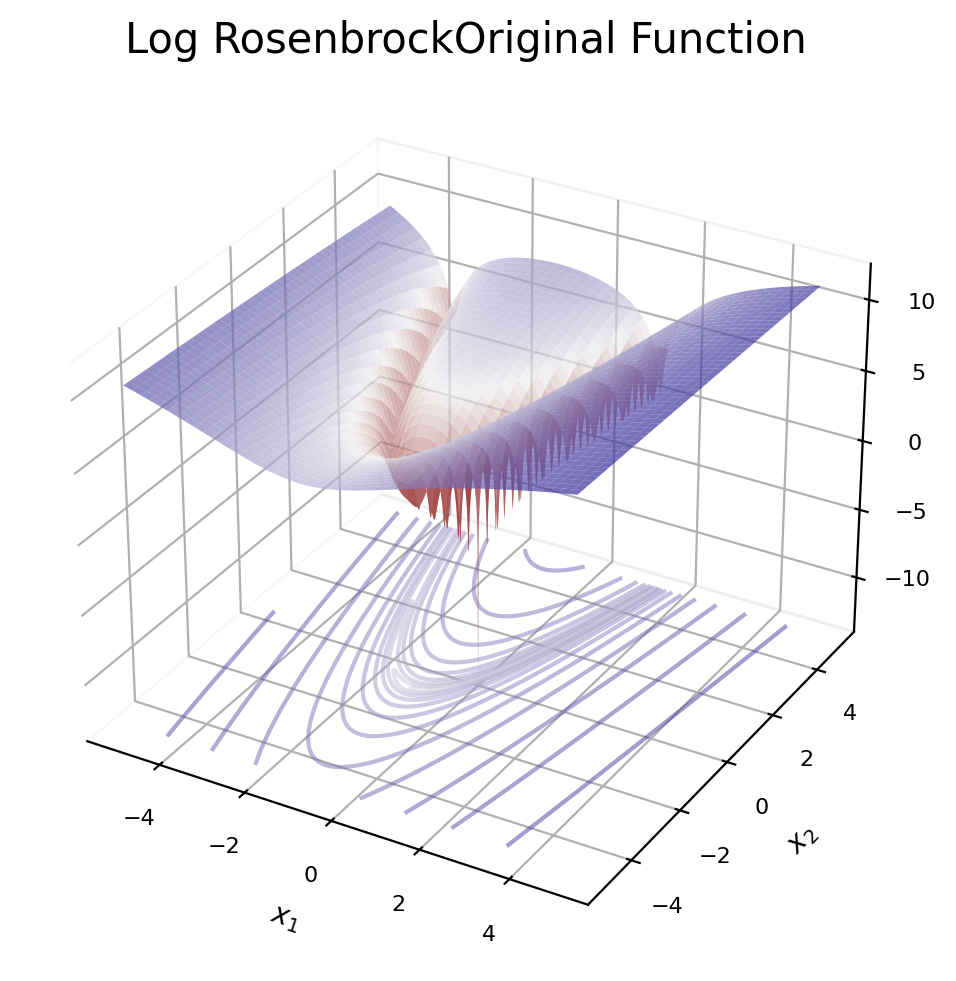

In [6]:
import jax
import jax.numpy as jnp
from evosax import CMA_ES
from evosax.problems import BBOBFitness

# Instantiate the problem evaluator
rosenbrock = BBOBFitness("RosenbrockOriginal", num_dims=2, seed_id=2)
rosenbrock.visualize(plot_log_fn=True)

In [7]:
# Instantiate the search strategy
rng = jax.random.PRNGKey(0)
strategy = CMA_ES(popsize=20, num_dims=2, elite_ratio=0.5)
es_params = strategy.default_params.replace(init_min=-2, init_max=2)

state = strategy.initialize(rng, es_params)

# Run ask-eval-tell loop - NOTE: By default minimization
for t in range(50):
    rng, rng_gen, rng_eval = jax.random.split(rng, 3)
    x, state = strategy.ask(rng_gen, state, es_params)
    print(x.shape)
    fitness = rosenbrock.rollout(rng_eval, x)
    state = strategy.tell(x, fitness, state, es_params)

    if (t + 1) % 10 == 0:
        print("CMA-ES - # Gen: {}|Fitness: {:.5f}|Params: {}".format(
            t+1, state.best_fitness, state.best_member))

(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
CMA-ES - # Gen: 10|Fitness: 0.11797|Params: [-0.24922171 -0.45996717]
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
CMA-ES - # Gen: 20|Fitness: 0.06408|Params: [-0.2525504  -0.44303307]
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
CMA-ES - # Gen: 30|Fitness: 0.00020|Params: [-0.00756242 -0.0138556 ]
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
CMA-ES - # Gen: 40|Fitness: 0.00000|Params: [-0.00053316 -0.00099349]
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)
CMA-ES - # Gen: 50|Fitness: 0.00000|Params: [-5.464695e-06 -9.789607e-06]


In [4]:
from evosax import Strategies
rng = jax.random.PRNGKey(0)

for s_name in ["SimpleES", "SimpleGA", "PSO", "DE", "Sep_CMA_ES",
               "Full_iAMaLGaM", "Indep_iAMaLGaM", "MA_ES", "LM_MA_ES",
               "RmES", "GLD", "SimAnneal", "GESMR_GA", "SAMR_GA"]:
    strategy = Strategies[s_name](popsize=20, num_dims=2)
    es_params = strategy.default_params
    es_params = es_params.replace(init_min=-2, init_max=2)
    state = strategy.initialize(rng, es_params)

    for t in range(30):
        rng, rng_gen, rng_eval = jax.random.split(rng, 3)
        x, state = strategy.ask(rng_gen, state, es_params)
        fitness = rosenbrock.rollout(rng_eval, x)
        state = strategy.tell(x, fitness, state, es_params)

        if (t + 1) % 5 == 0:
            print("{} - # Gen: {}|Fitness: {:.2f}|Params: {}".format(
                s_name, t+1, state.best_fitness, state.best_member))
    print(20*"=")

SimpleES - # Gen: 5|Fitness: 2.41|Params: [0.57494265 1.3363407 ]
SimpleES - # Gen: 10|Fitness: 0.05|Params: [-0.02394061 -0.06951429]
SimpleES - # Gen: 15|Fitness: 0.02|Params: [0.05201925 0.11855013]
SimpleES - # Gen: 20|Fitness: 0.02|Params: [0.05201925 0.11855013]
SimpleES - # Gen: 25|Fitness: 0.02|Params: [0.05201925 0.11855013]
SimpleES - # Gen: 30|Fitness: 0.02|Params: [0.05201925 0.11855013]
SimpleGA - # Gen: 5|Fitness: 0.05|Params: [-0.23124486 -0.40957353]
SimpleGA - # Gen: 10|Fitness: 0.03|Params: [-0.13031453 -0.23322381]
SimpleGA - # Gen: 15|Fitness: 0.02|Params: [-0.11532616 -0.20849138]
SimpleGA - # Gen: 20|Fitness: 0.00|Params: [-0.00291445 -0.00076399]
SimpleGA - # Gen: 25|Fitness: 0.00|Params: [-0.00291445 -0.00076399]
SimpleGA - # Gen: 30|Fitness: 0.00|Params: [0.04794273 0.09704389]
PSO - # Gen: 5|Fitness: 0.32|Params: [-0.01428866  0.02790421]
PSO - # Gen: 10|Fitness: 0.19|Params: [-0.32952124 -0.52207595]
PSO - # Gen: 15|Fitness: 0.12|Params: [-0.33950216 -0.56108